In [9]:
#!pip install git+https://github.com/lionfish0/download_thingspeak.git`

In [10]:
from download_thingspeak import download
import pandas as pd
#PMS5003
pms5003 = pd.DataFrame(download('http://thingspeak.com/channels/718028',verbose=True)) #https://thingspeak.com/channels/718028
#?
alphasenseN2 = pd.DataFrame(download('http://thingspeak.com/channels/295702',verbose=True)) #https://thingspeak.com/channels/295702

pms5003['created_at'] = pd.to_datetime(pms5003['created_at'])
for i in range(1,5):
    pms5003['field%d' % i] = pd.to_numeric(pms5003['field%d' % i])
    alphasenseN2['field%d' % i] = pd.to_numeric(alphasenseN2['field%d' % i])
alphasenseN2['created_at'] = pd.to_datetime(alphasenseN2['created_at'])
#TODO Should deal with timezones properly, they're a bit of a mess
#this will do.
alphasenseN2['created_at'] = alphasenseN2['created_at']+pd.Timedelta(3,'hours') #.tz_convert(None)
pms5003['created_at']=pms5003['created_at']+pd.Timedelta(3,'hours')

Using cache
Using 68528 records from cache
Loading from http://thingspeak.com/channels/718028/feeds/entry/68529.json
Loading from http://thingspeak.com/channels/718028/feeds.json?start=2019-05-20T21:36:58Z&end=2019-05-20T21:38:13Z
    Adding 0 records...
Loading from http://thingspeak.com/channels/718028/feeds/entry/76528.json
Loading from http://thingspeak.com/channels/718028/feeds.json?start=2019-05-20T21:38:14Z&end=2019-05-20T21:40:00Z
    Adding 2 records...
New cache has 68530 records, saving.
Using cache
Using 562570 records from cache
Loading from http://thingspeak.com/channels/295702/feeds/entry/562571.json
Loading from http://thingspeak.com/channels/295702/feeds.json?start=2019-05-20T21:37:55Z&end=2019-05-20T21:39:07Z
    Adding 0 records...
Loading from http://thingspeak.com/channels/295702/feeds/entry/570570.json
Loading from http://thingspeak.com/channels/295702/feeds.json?start=2019-05-20T21:39:08Z&end=2019-05-20T21:40:03Z
    Adding 1 records...
New cache has 562571 recor

In [11]:
import pandas as pd
tno4036data = pd.read_csv('TNO4036.csv')
tno4036data['TimeStamp'] = pd.to_datetime(tno4036data['TimeStamp'].str.replace('/20','-').str.replace('/','-'),format='%d-%m-%y %H:%M')
tno4036data=tno4036data.drop(tno4036data.index[5238:5274])

/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


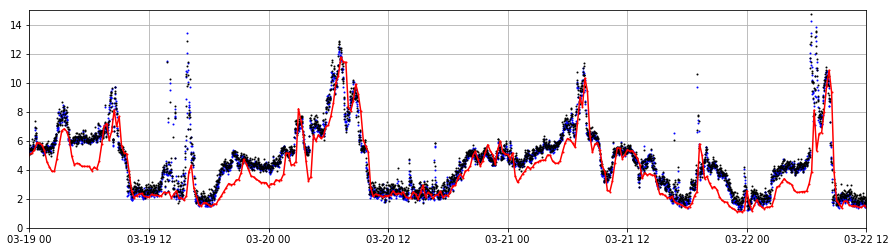

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[15,4])
def plot(x,y,m,ylim,scale,offset):
    plt.plot(x,y*scale+offset,m,markersize=2,alpha=1)
    plt.xlim([pd.to_datetime('2019-03-19 00:00+00:00'),pd.to_datetime('2019-03-22 12:00+00:00')])
    plt.ylim([0,ylim])
    plt.grid()
    
#plt.subplot(3,1,1)
plot(pms5003['created_at'],pms5003['field1'],'b.',50,0.12,0)
plot(pms5003['created_at'],pms5003['field3'],'k.',50,0.12,0)
#plot(alphasenseN2['created_at'],alphasenseN2['field2'],'g.',15,0.4,0)
plot(tno4036data['TimeStamp'],tno4036data['PM2.5 particles (ug/m^3)'],'.-r',15,1,0)

In [13]:
pms5003['seconds'] = (pms5003['created_at']-pd.to_datetime('2019-03-19 00:00+00:00')).dt.total_seconds() #,pms5003['field1']
tno4036data['seconds'] = (tno4036data['TimeStamp']-pd.to_datetime('2019-03-19 00:00')).dt.total_seconds() #,pms5003['field1']

In [14]:
import numpy as np
pms = np.c_[pms5003['seconds'].values/3600,pms5003['field1'].values]
tno = np.c_[tno4036data['seconds'].values/3600,tno4036data['PM2.5 particles (ug/m^3)'].values]
pms = pms[(pms[:,0]>=0) & (pms[:,0]<(24*3))]
tno = tno[(tno[:,0]>=0) & (tno[:,0]<(24*3))]

In [15]:
lowres = []
stepsize = 3
periods = np.arange(0,24*5,stepsize)
for step in periods:
    lowres.append([step,np.mean(tno[(tno[:,0]>=step) & (tno[:,0]<step+stepsize),1])])
lowres = np.array(lowres)
lowres = lowres[~np.isnan(lowres[:,1]),:]

/home/ubuntu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
lowres

array([[ 0.        ,  4.9725    ],
       [ 3.        ,  5.24      ],
       [ 6.        ,  5.7325    ],
       [ 9.        ,  3.61416667],
       [12.        ,  2.29916667],
       [15.        ,  2.32416667],
       [18.        ,  2.3375    ],
       [21.        ,  3.60666667],
       [24.        ,  3.835     ],
       [27.        ,  5.97333333],
       [30.        ,  9.46416667],
       [33.        ,  4.19083333],
       [36.        ,  2.305     ],
       [39.        ,  2.30833333],
       [42.        ,  3.6275    ],
       [45.        ,  5.08583333],
       [48.        ,  4.1425    ],
       [51.        ,  4.805     ],
       [54.        ,  7.11333333],
       [57.        ,  4.4075    ],
       [60.        ,  4.33916667],
       [63.        ,  2.03      ],
       [66.        ,  2.9725    ],
       [69.        ,  1.57416667]])

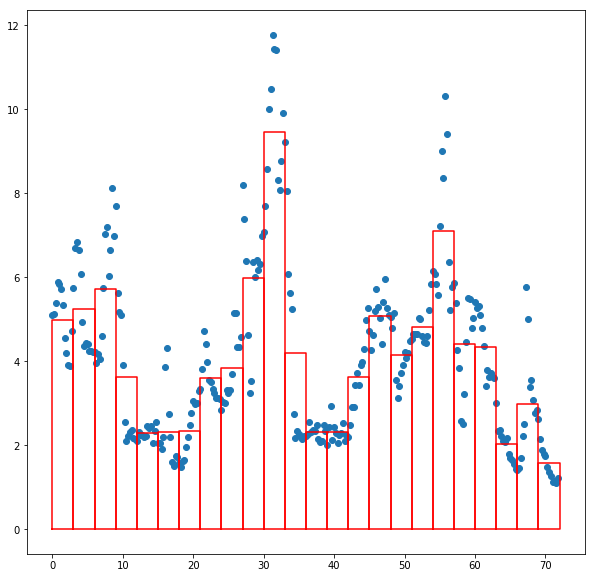

In [17]:
plt.figure(figsize=[10,10])
plt.scatter(tno[:,0],tno[:,1])
for lr in lowres:
    plt.plot([lr[0],lr[0]+stepsize,lr[0]+stepsize,lr[0],lr[0]],[0,0,lr[1],lr[1],0],'r-')

In [18]:
X1 = np.c_[lowres[:,0]+stepsize,lowres[:,0],np.zeros(len(lowres))]
Y1 = lowres[:,1:2]*stepsize

In [19]:
#X2 = np.c_[pms[:,0],np.full(len(pms),np.NaN),np.ones(len(pms))] #maybe need to use another integral
integrationperiod = 60/3600 #np.mean(np.diff(pms[:,0])) #really should find out this
fullX2 = np.c_[pms[:,0]+integrationperiod,pms[:,0],np.zeros(len(pms))] 
fullY2 = pms[:,1:2]*integrationperiod

In [20]:
X2 = []
Y2 = []
stepdown = 5
for i in range(0,len(fullX2)-stepdown,stepdown):
    X2.append([fullX2[i+stepdown-1,0],fullX2[i,1]])
    Y2.append(np.sum(fullY2[i:i+stepdown]))
X2 = np.array(X2)######<<<<<<<<<<<<<<<<<TO DECIDE
X2 = np.c_[X2,np.zeros(len(X2))]
Y2 = np.array(Y2)

In [21]:
tnointegrationperiod = np.median(np.diff(tno[:,0]))
testX1 = np.c_[tno[:,0]+tnointegrationperiod,tno[:,0],np.zeros(len(tno))]
testY1 = tno[:,1]

(0, 20)

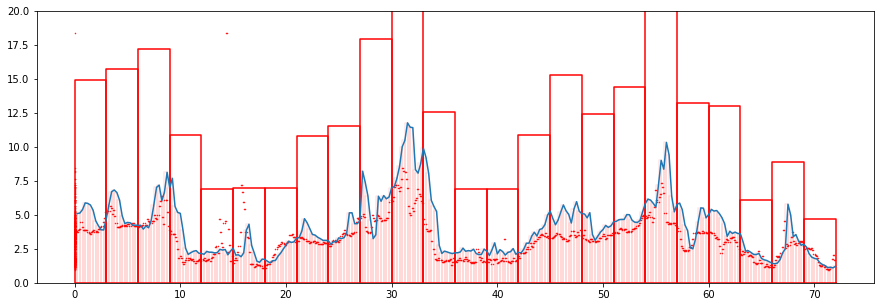

In [22]:
plt.figure(figsize=[15,5])
#plt.plot(X1,Y1/3,'b-')
for x,y in zip(X1,Y1):
    plt.plot([x[0],x[1],x[1],x[0],x[0]],[0,0,y,y,0],'r-')
for x,y in zip(testX1,testY1):
    plt.plot([x[0],x[1],x[1],x[0],x[0]],[0,0,y,y,0],'r-',alpha=0.1)    
plt.plot(X2,Y2,'.r',markersize=1)
plt.plot(testX1[:,0],testY1)
plt.ylim([0,20])

# Analysis

In [23]:
import numpy as np
from scipy.stats import multinomial
from scipy.linalg.blas import dtrmm

import GPy
from GPy.util import choleskies
from GPy.core.parameterization.param import Param
from GPy.kern import Coregionalize
from GPy.likelihoods import Likelihood
from GPy.util import linalg

from hetmogp.util import draw_mini_slices
from hetmogp.het_likelihood import HetLikelihood
#from hetmogp.model import HetMOGP
from hetmogp.svmogp import SVMOGP
#from hetmogp import multi_output
from hetmogp import util
from hetmogp.util import vem_algorithm as VEM

import matplotlib.pyplot as plt
from matplotlib.pyplot import gca
from matplotlib import rc, font_manager
from matplotlib import rcParams
#from matplotlib2tikz import save as tikz_save

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import GPy
import matplotlib.pyplot as plt

In [24]:
from hetmogp.likelihoods.bernoulli import Bernoulli
from hetmogp.likelihoods.gaussian import Gaussian
from hetmogp.likelihoods.categorical import Categorical
from hetmogp.likelihoods.hetgaussian import HetGaussian
from hetmogp.likelihoods.beta import Beta
from hetmogp.likelihoods.gamma import Gamma
from hetmogp.likelihoods.exponential import Exponential

In [25]:
M = 10  # number of inducing points
Q = 1  # number of latent functions

# Heterogeneous Likelihood Definition
# likelihoods_list = [Gaussian(sigma=1.), Bernoulli()] # Real + Binary
#likelihoods_list = [Bernoulli(), Bernoulli()] # Real + Binary
likelihoods_list = [Gaussian(sigma=0.1),Gaussian(sigma=0.01)]

likelihood = HetLikelihood(likelihoods_list)
Y_metadata = likelihood.generate_metadata()

D = likelihood.num_output_functions(Y_metadata)

#W_list, _ = multi_output.random_W_kappas(Q, D, rank=1, experiment=True)
W_list, _ = util.random_W_kappas(Q, D, rank=1, experiment=True)



In [26]:
#X2 = X2[0:1,:]
#Y2 = Y2[0:1]

In [27]:
X = [X1,X2]
Y = [Y1,Y2]

In [28]:
air_pollution_demo_data = {'X':X,'Y':Y,'testX':testX1,'testY':testY1}
import pickle
pickle.dump(air_pollution_demo_data,open('air_pollution_demo_data.p','wb'))


In [29]:
from hetmogp.error_func import snlp, smse, mae

In [30]:
# KERNELS
input_dim = 3
Q = 1
ls_q = np.array(([2.0]*Q))
var_q = np.array(([.5]*Q))
kern_list = util.latent_functions_prior(Q, lengthscale=[ls_q], variance=[var_q], input_dim=input_dim,kernel=GPy.kern.Mix_Integral_)

def callback(i):
    print(i)
    if i['n_iter'] > 4000:
        return True
    return False

X_ = np.vstack((X[0], X[1]))
from sklearn.cluster import KMeans
#kmeans_X = KMeans(n_clusters=100, random_state=0).fit(X_)
#Z = kmeans_X.cluster_centers_
Ninducing = 500
Z = np.zeros([Ninducing,X_.shape[1]])
Z[:,-1] = 1
Z[:,0] = np.linspace(0,24*5,Ninducing)

In [31]:
model = SVMOGP(X=X, Y=Y, Z=Z, kern_list=kern_list, likelihood=likelihood, Y_metadata=Y_metadata,batch_size=70)
model.Z.fix()

 /home/ubuntu/anaconda3/lib/python3.7/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


array([   0,    1,    2, ..., 1497, 1498, 1499])

In [32]:
model.kern.lengthscale.fix(0.5)
model.kern.variance = 5000 #.fix(5000)
model.kern_q0.lengthscale.fix(0.5)
model.kern_q0.variance = 5000#.fix(5000)

In [ ]:
#vem_model=VEM(model,vem_iters=30,maxIter_perVEM=30,optZ=False,verbose=True,verbose_plot=False,non_chained=True)
import climin
opt = climin.Adam(model.optimizer_array,model.stochastic_grad,step_rate=0.1,decay_mom1=1-0.9, decay_mom2=1-0.999)
opt.minimize_until(callback)

 /home/ubuntu/anaconda3/lib/python3.7/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /home/ubuntu/anaconda3/lib/python3.7/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


{'n_iter': 1, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([ 1.00000490e-001,  1.00000490e-001,  1.00000490e-001, ...,
       -1.00000490e-001,  8.03923814e-295,  9.87287361e-294]), 'offset': 1e-08, 'est_mom1_b': array([ 1.13932907e+001,  3.74955009e+001,  2.47598533e+001, ...,
       -9.48100879e+002,  8.03923894e-303,  9.87287460e-302]), 'est_mom2_b': array([1.29807073e+01, 1.40591259e+02, 6.13050336e+01, ...,
       8.98895276e+04, 0.00000000e+00, 0.00000000e+00]), 'gradient': array([ 1.13932907e+002,  3.74955009e+002,  2.47598533e+002, ...,
       -9.48100879e+003,  8.03923894e-302,  9.87287460e-301]), 'args': [], 'kwargs': {}}
{'n_iter': 2, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([9.93888434e-002, 9.93920858e-002, 9.93852194e-002, ...,
       6.93801882e-002, 8.03915424e-295, 9.87116454e-294]), 'offset': 1e-08, 'est_mo

{'n_iter': 13, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([3.71660162e-002, 3.71746180e-002, 3.70067272e-002, ...,
       8.84466498e-002, 8.03823031e-295, 9.85740233e-294]), 'offset': 1e-08, 'est_mom1_b': array([1.68686990e+003, 5.52978539e+003, 3.97050868e+003, ...,
       6.35302838e+005, 5.99502009e-302, 7.35178302e-301]), 'est_mom2_b': array([4.78575450e+05, 5.14046954e+06, 2.67430052e+06, ...,
       1.19861051e+10, 0.00000000e+00, 0.00000000e+00]), 'gradient': array([1.48744676e+002, 4.89790192e+002, 3.23054356e+002, ...,
       9.34332353e+005, 8.03763079e-302, 9.96874453e-301]), 'args': [], 'kwargs': {}}
{'n_iter': 14, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([3.39040734e-002, 3.39133852e-002, 3.37336155e-002, ...,
       8.76836771e-002, 8.03813421e-295, 9.86145263e-294]), 'offset': 1e-08, 'est_mom1_b': array([1.

{'n_iter': 25, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([3.45568072e-002, 3.45617854e-002, 3.44661253e-002, ...,
       5.50487494e-002, 8.03681760e-295, 9.85576442e-294]), 'offset': 1e-08, 'est_mom1_b': array([3.28187444e+003, 1.07599730e+004, 7.76827085e+003, ...,
       5.42114827e+005, 7.45985616e-302, 9.14822118e-301]), 'est_mom2_b': array([2.58595739e+06, 2.77891134e+07, 1.45649318e+07, ...,
       2.78056031e+10, 0.00000000e+00, 0.00000000e+00]), 'gradient': array([ 1.13154655e+002,  3.72599076e+002,  2.45757785e+002, ...,
       -5.14852122e+005,  8.03570394e-302,  9.86400815e-301]), 'args': [], 'kwargs': {}}
{'n_iter': 26, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([3.15988953e-002, 3.16039562e-002, 3.15063304e-002, ...,
       5.38737394e-002, 8.03668027e-295, 9.86268512e-294]), 'offset': 1e-08, 'est_mom1_b': arr

{'n_iter': 37, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([ 3.03573213e-002,  3.03621270e-002,  3.03324573e-002, ...,
       -1.00273208e-002,  8.03499081e-295,  9.87865568e-294]), 'offset': 1e-08, 'est_mom1_b': array([ 3.88882686e+003,  1.27533470e+004,  9.25892124e+003, ...,
       -1.18684816e+005,  7.87207696e-302,  9.67836051e-301]), 'est_mom2_b': array([6.21309280e+06, 6.68007724e+07, 3.52779311e+07, ...,
       5.30417718e+10, 0.00000000e+00, 0.00000000e+00]), 'gradient': array([ 7.88308774e+001,  2.59576506e+002,  1.71212039e+002, ...,
       -7.26728872e+005,  8.03355104e-302,  1.00490103e-300]), 'args': [], 'kwargs': {}}
{'n_iter': 38, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([ 2.77001678e-002,  2.77048055e-002,  2.76720370e-002, ...,
       -2.74684319e-002,  8.03482592e-295,  9.84278691e-294]), 'offset': 1e-08,

{'n_iter': 49, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([ 2.46902881e-002,  2.46960369e-002,  2.47049049e-002, ...,
       -1.13363656e-001,  8.03303424e-295,  9.80506946e-294]), 'offset': 1e-08, 'est_mom1_b': array([ 3.52652900e+003,  1.15680332e+004,  8.43081978e+003, ...,
       -2.70336551e+006,  7.98703382e-302,  9.74892164e-301]), 'est_mom2_b': array([9.87284126e+06, 1.06185221e+08, 5.63602342e+07, ...,
       2.75208217e+11, 0.00000000e+00, 0.00000000e+00]), 'gradient': array([ 7.01199443e+001,  2.30893913e+002,  1.52292908e+002, ...,
       -8.24807595e+006,  8.03174847e-302,  9.48772473e-301]), 'args': [], 'kwargs': {}}
{'n_iter': 50, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([ 5.10312566e-002,  5.10398931e-002,  5.11083005e-002, ...,
       -7.57784072e-002,  8.03290017e-295,  9.82273374e-294]), 'offset': 1e-08,

{'n_iter': 61, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([ 3.51325497e-002,  3.51323976e-002,  3.50845722e-002, ...,
       -5.91339755e-002,  8.03228918e-295,  9.82622628e-294]), 'offset': 1e-08, 'est_mom1_b': array([ 5.18672060e+003,  1.70102628e+004,  1.23802738e+004, ...,
       -1.74662556e+006,  8.01929857e-302,  9.81033433e-301]), 'est_mom2_b': array([1.29459585e+07, 1.39243301e+08, 7.39598415e+07, ...,
       5.18195108e+11, 0.00000000e+00, 0.00000000e+00]), 'gradient': array([5.81224158e+001, 1.90137216e+002, 1.27157983e+002, ...,
       2.24546106e+006, 8.03252172e-302, 9.86462528e-301]), 'args': [], 'kwargs': {}}
{'n_iter': 62, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([ 3.19195674e-002,  3.19195882e-002,  3.18724443e-002, ...,
       -5.26720550e-002,  8.03233177e-295,  9.82979015e-294]), 'offset': 1e-08, 'est_

{'n_iter': 73, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([1.98815302e-002, 1.98783228e-002, 1.97825460e-002, ...,
       1.43409642e-002, 8.03373166e-295, 9.84474497e-294]), 'offset': 1e-08, 'est_mom1_b': array([2.70653857e+003, 8.87482597e+003, 6.43593831e+003, ...,
       4.32207640e+005, 8.03006213e-302, 9.84024823e-301]), 'est_mom2_b': array([1.30647968e+07, 1.40518676e+08, 7.46162149e+07, ...,
       6.40327290e+11, 0.00000000e+00, 0.00000000e+00]), 'gradient': array([5.16239740e+001, 1.69991222e+002, 1.12122062e+002, ...,
       3.76588372e+006, 8.03538819e-302, 9.96596313e-301]), 'args': [], 'kwargs': {}}
{'n_iter': 74, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([1.80573877e-002, 1.80546355e-002, 1.79641970e-002, ...,
       1.65563229e-002, 8.03392417e-295, 9.84891062e-294]), 'offset': 1e-08, 'est_mom1_b': array([2.

{'n_iter': 85, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([1.44915774e-002, 1.44882575e-002, 1.43892143e-002, ...,
       1.78259004e-002, 8.03641894e-295, 9.85325562e-294]), 'offset': 1e-08, 'est_mom1_b': array([1.84527621e+003, 6.05024980e+003, 4.37808684e+003, ...,
       5.46442602e+005, 8.03538226e-302, 9.85198458e-301]), 'est_mom2_b': array([1.32222033e+07, 1.42208868e+08, 7.54930489e+07, ...,
       7.66299486e+11, 0.00000000e+00, 0.00000000e+00]), 'gradient': array([ 4.90783147e+001,  1.61609188e+002,  1.06593201e+002, ...,
       -2.30950735e+006,  8.03863163e-302,  9.86760196e-301]), 'args': [], 'kwargs': {}}
{'n_iter': 86, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([1.31607747e-002, 1.31579263e-002, 1.30645607e-002, ...,
       1.35537667e-002, 8.03666700e-295, 9.86039649e-294]), 'offset': 1e-08, 'est_mom1_b': arr

{'n_iter': 97, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([ 1.29046335e-002,  1.29023279e-002,  1.28171006e-002, ...,
       -3.72163892e-003,  8.03946258e-295,  9.88308857e-294]), 'offset': 1e-08, 'est_mom1_b': array([ 1.55924363e+003,  5.11262276e+003,  3.69999148e+003, ...,
       -1.18528894e+005,  8.03916974e-302,  9.88272858e-301]), 'est_mom2_b': array([1.35037335e+07, 1.45234102e+08, 7.70795408e+07, ...,
       9.38203929e+11, 0.00000000e+00, 0.00000000e+00]), 'gradient': array([ 4.70561066e+001,  1.54950760e+002,  1.02201216e+002, ...,
       -1.03536415e+006,  8.04176231e-302,  1.00592816e-300]), 'args': [], 'kwargs': {}}
{'n_iter': 98, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([ 1.17158709e-002,  1.17139443e-002,  1.16331136e-002, ...,
       -1.98380560e-002,  8.03971784e-295,  9.84845468e-294]), 'offset': 1e-08,

{'n_iter': 109, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([ 1.09820599e-002,  1.09806628e-002,  1.09071614e-002, ...,
       -3.14749631e-002,  8.04248497e-295,  9.81668994e-294]), 'offset': 1e-08, 'est_mom1_b': array([ 1.26740374e+003,  4.15588646e+003,  3.00701733e+003, ...,
       -1.06576982e+006,  8.04240229e-302,  9.81658902e-301]), 'est_mom2_b': array([1.37609799e+07, 1.47998474e+08, 7.85299613e+07, ...,
       1.18463179e+12, 0.00000000e+00, 0.00000000e+00]), 'gradient': array([ 4.49963681e+001,  1.48168759e+002,  9.77277206e+001, ...,
       -6.89418895e+006,  8.04471358e-302,  9.50304012e-301]), 'args': [], 'kwargs': {}}
{'n_iter': 110, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([ 2.72675471e-002,  2.72625602e-002,  2.71473456e-002, ...,
       -5.47065209e-004,  8.04273170e-295,  9.83474817e-294]), 'offset': 1e-0

{'n_iter': 121, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([2.63081776e-002, 2.63048549e-002, 2.62175770e-002, ...,
       1.16506204e-002, 8.04538083e-295, 9.84223187e-294]), 'offset': 1e-08, 'est_mom1_b': array([2.96389789e+003, 9.71868517e+003, 7.05490011e+003, ...,
       4.20480354e+005, 8.04535753e-302, 9.84220337e-301]), 'est_mom2_b': array([1.44719587e+07, 1.55641561e+08, 8.25617720e+07, ...,
       1.48516833e+12, 0.00000000e+00, 0.00000000e+00]), 'gradient': array([4.28457527e+001, 1.40108508e+002, 9.37781286e+001, ...,
       3.90430282e+006, 8.04750390e-302, 9.88302467e-301]), 'args': [], 'kwargs': {}}
{'n_iter': 122, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([2.38188559e-002, 2.38160078e-002, 2.37335283e-002, ...,
       1.43443847e-002, 8.04561569e-295, 9.84603342e-294]), 'offset': 1e-08, 'est_mom1_b': array([

{'n_iter': 133, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([2.29924080e-002, 2.29914033e-002, 2.29356724e-002, ...,
       2.04387672e-002, 8.04813640e-295, 9.86238735e-294]), 'offset': 1e-08, 'est_mom1_b': array([2.50639483e+003, 8.21918588e+003, 5.97163831e+003, ...,
       7.59037226e+005, 8.04812987e-302, 9.86237936e-301]), 'est_mom2_b': array([1.48055657e+07, 1.59228791e+08, 8.44615389e+07, ...,
       1.71835032e+12, 0.00000000e+00, 0.00000000e+00]), 'gradient': array([4.01477595e+001, 1.32203994e+002, 8.71971346e+001, ...,
       3.48265401e+006, 8.05015708e-302, 9.98428037e-301]), 'args': [], 'kwargs': {}}
{'n_iter': 134, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([2.08128638e-002, 2.08121074e-002, 2.07582638e-002, ...,
       1.68450596e-002, 8.04836004e-295, 9.86659772e-294]), 'offset': 1e-08, 'est_mom1_b': array([

{'n_iter': 145, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([1.97958502e-002, 1.97965570e-002, 1.97644328e-002, ...,
       8.45557424e-003, 8.05076737e-295, 9.87084414e-294]), 'offset': 1e-08, 'est_mom1_b': array([2.09744614e+003, 6.87867639e+003, 5.00179885e+003, ...,
       3.22448726e+005, 8.05076559e-302, 9.87084195e-301]), 'est_mom2_b': array([1.51599390e+07, 1.63040148e+08, 8.64864096e+07, ...,
       1.96380903e+12, 0.00000000e+00, 0.00000000e+00]), 'gradient': array([ 3.76410898e+001,  1.23950421e+002,  8.17529635e+001, ...,
       -2.77468373e+006,  8.05270268e-302,  9.88487449e-301]), 'args': [], 'kwargs': {}}
{'n_iter': 146, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([1.79176296e-002, 1.79184144e-002, 1.78860320e-002, ...,
       6.61859784e-003, 8.05098172e-295, 9.87795522e-294]), 'offset': 1e-08, 'est_mom1_b': a

{'n_iter': 157, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([1.69472309e-002, 1.69492584e-002, 1.69359107e-002, ...,
       5.00369307e-003, 8.05329704e-295, 9.90009200e-294]), 'offset': 1e-08, 'est_mom1_b': array([1.75219094e+003, 5.74689796e+003, 4.18258497e+003, ...,
       1.95570074e+005, 8.05329659e-302, 9.90009145e-301]), 'est_mom2_b': array([1.55388745e+07, 1.67116664e+08, 8.86597741e+07, ...,
       2.22063747e+12, 0.00000000e+00, 0.00000000e+00]), 'gradient': array([ 3.51980113e+001,  1.15906250e+002,  7.64469068e+001, ...,
       -5.60296842e+005,  8.05516414e-302,  1.00760457e-300]), 'args': [], 'kwargs': {}}
{'n_iter': 158, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([ 1.53389199e-002,  1.53408913e-002,  1.53256107e-002, ...,
       -1.19545246e-002,  8.05350395e-295,  9.86534198e-294]), 'offset': 1e-08, 'est_mom1

{'n_iter': 169, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([ 1.44773199e-002,  1.44803843e-002,  1.44823916e-002, ...,
       -3.41533917e-002,  8.05574495e-295,  9.83287711e-294]), 'offset': 1e-08, 'est_mom1_b': array([ 1.46580172e+003,  4.80806508e+003,  3.50294544e+003, ...,
       -1.40598793e+006,  8.05574488e-302,  9.83287703e-301]), 'est_mom2_b': array([1.59470026e+07, 1.71508424e+08, 9.10104216e+07, ...,
       2.63633419e+12, 0.00000000e+00, 0.00000000e+00]), 'gradient': array([ 3.28773070e+001,  1.08265042e+002,  7.14066330e+001, ...,
       -9.54964299e+006,  8.05755683e-302,  9.51821157e-301]), 'args': [], 'kwargs': {}}
{'n_iter': 170, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([ 3.72335413e-002,  3.72428539e-002,  3.73466511e-002, ...,
       -1.69316608e-003,  8.05594585e-295,  9.85090739e-294]), 'offset': 1e-0

{'n_iter': 181, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([3.48247946e-002, 3.48363153e-002, 3.49781774e-002, ...,
       9.76929063e-003, 8.05812564e-295, 9.85782355e-294]), 'offset': 1e-08, 'est_mom1_b': array([3.53212468e+003, 1.15876156e+004, 8.47879312e+003, ...,
       4.24588242e+005, 8.05812568e-302, 9.85782360e-301]), 'est_mom2_b': array([1.70396514e+07, 1.83269212e+08, 9.73283822e+07, ...,
       3.12878447e+12, 0.00000000e+00, 0.00000000e+00]), 'gradient': array([3.06392202e+001, 9.97855578e+001, 6.73638213e+001, ...,
       4.98651089e+006, 8.05989085e-302, 9.89823691e-301]), 'args': [], 'kwargs': {}}
{'n_iter': 182, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([3.14666817e-002, 3.14772044e-002, 3.16024183e-002, ...,
       1.26696167e-002, 8.05832132e-295, 9.86158252e-294]), 'offset': 1e-08, 'est_mom1_b': array([

{'n_iter': 193, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([2.92844260e-002, 2.92969689e-002, 2.94520675e-002, ...,
       2.20553987e-002, 8.06045016e-295, 9.87747671e-294]), 'offset': 1e-08, 'est_mom1_b': array([2.92511544e+003, 9.59735675e+003, 7.03306220e+003, ...,
       9.85531307e+005, 8.06045022e-302, 9.87747680e-301]), 'est_mom2_b': array([1.75198860e+07, 1.88441514e+08, 1.00132724e+08, ...,
       3.50614367e+12, 0.00000000e+00, 0.00000000e+00]), 'gradient': array([2.80825078e+001, 9.24776873e+001, 6.09929386e+001, ...,
       4.79118434e+006, 8.06217579e-302, 9.99918669e-301]), 'args': [], 'kwargs': {}}
{'n_iter': 194, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([2.64589318e-002, 2.64703674e-002, 2.66076775e-002, ...,
       1.85697668e-002, 8.06064156e-295, 9.88165347e-294]), 'offset': 1e-08, 'est_mom1_b': array([

{'n_iter': 205, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([2.45158999e-002, 2.45288933e-002, 2.46897387e-002, ...,
       8.58758730e-003, 8.06272735e-295, 9.88550769e-294]), 'offset': 1e-08, 'est_mom1_b': array([2.41650676e+003, 7.92959278e+003, 5.82024078e+003, ...,
       3.93840775e+005, 8.06272742e-302, 9.88550779e-301]), 'est_mom2_b': array([1.80166885e+07, 1.93794069e+08, 1.03048941e+08, ...,
       3.90026076e+12, 0.00000000e+00, 0.00000000e+00]), 'gradient': array([ 2.59318473e+001,  8.53964727e+001,  5.63219944e+001, ...,
       -3.74332016e+006,  8.06442003e-302,  9.89925780e-301]), 'args': [], 'kwargs': {}}
{'n_iter': 206, 'step_rate': 0.1, 'decay': 0.99999999, 'decay_mom1': 0.09999999999999998, 'decay_mom2': 0.0010000000000000009, 'step': array([2.21499625e-002, 2.21617955e-002, 2.23044303e-002, ...,
       6.83857704e-003, 8.06291517e-295, 9.89259625e-294]), 'offset': 1e-08, 'est_mom1_b': a

In [ ]:
plt.figure(figsize=[15,12])
plt.subplot(2,1,1)
plt.plot(X2[:,0],Y2/np.median(X2[:,0]-X2[:,1]),'g-')
plt.title('Colocated low-cost sensor')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.title('Reference sensor data and prediction')
means,variances = model.predict(testX1)
mean = means[0]
var = variances[0]
plt.plot(testX1[:,0],4*mean,'b-',label='prediction')
plt.plot(testX1[:,0],4*mean+4*np.sqrt(var)*2,'b-',alpha=0.2)
plt.plot(testX1[:,0],4*mean-4*np.sqrt(var)*2,'b-',alpha=0.2)
plt.plot(testX1[:,0],testY1,'r-',label='true') #test data red line

lab = 'training data'
for x1,y1 in zip(X1,Y1):
    #plt.plot([lr[0],lr[0]+stepsize,lr[0]+stepsize,lr[0],lr[0]],[0,0,lr[1],lr[1],0],'r-')
    plt.plot([x1[0],x1[0]-stepsize,x1[0]-stepsize,x1[0],x1[0]],[0,0,y1/3,y1/3,0],'r-',label=lab)
    lab = None
plt.legend()
plt.grid()
plt.vlines(model.Z,0,1)
plt.ylim([0,20])
plt.xlim([X[0][0,1],X[0][-1,0]])

In [ ]:
np.mean(np.abs(testY1 - mean[:,0]))

In [ ]:
#3.449975592412143 [no extra data]
#3.4329467097085566

In [ ]:
model